# An Example SubSection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This is a subsection that is actually a Jupyter Notebook (rather than a Markdown file). The benefit of these types of files is that you can actually show code and its corresponding output.

For example, we could show how to load a csv file and visualize it. The following dataset was obtained through the wooldridge library and is the _wage1_ dataset.

In [2]:
wages = pd.read_csv("wage.csv")
wages = wages[["wage", "educ", "exper", "tenure"]]
wages.head()

,wage,educ,exper,tenure
0,3.10,11,2,0
1,3.24,12,22,2
2,3.00,11,2,0
3,6.00,8,44,28
4,5.30,12,7,2


## An A/B Test

A Jupyter Notebook can be incredibly helpful if we want to demonstrate some process and walk students through it. Let's do a hypothesis test using the `wage` dataset we just loaded in.

- **Null hypothesis**: The true wage distribution of those who completed high school is the same as the true wage distribution of those who _did not_ complete high school.

- **Alternative hypothesis**: The average wage of those who completed high school is _larger than_ the average wage of those who did not complete high school.

- **Test statistic**: The difference in average wages for those who completed high school and those who did not.

For simplicity's sake, let's assume that having 12 years of education means that one completed high school.

In [3]:
wages.shape

(526, 4)

In [4]:
wages["hs degree"] = (wages["educ"] >= 12)
wages.head()

,wage,educ,exper,tenure,hs degree
0,3.10,11,2,0,False
1,3.24,12,22,2,True
2,3.00,11,2,0,False
3,6.00,8,44,28,False
4,5.30,12,7,2,True


In [5]:
by_hs_degree = wages.groupby("hs degree").mean()
by_hs_degree

,wage,educ,exper,tenure
hs degree,,,,
False,4.056724,8.913793,20.948276,5.939655
True,6.416512,13.595122,15.904878,4.868293


In [6]:
obs_stat = by_hs_degree["wage"][1] - by_hs_degree["wage"][0]
obs_stat

2.3597880525434585

In [7]:
simulated_stats = []

for i in range(5000):
    wages["shuffle"] = wages["hs degree"].sample(n=526, ignore_index=True)
    avg_wages = wages.groupby("shuffle").mean()["wage"]
    simulated_stats += [avg_wages[1] - avg_wages[0]]

TypeError: sample() got an unexpected keyword argument 'ignore_index'

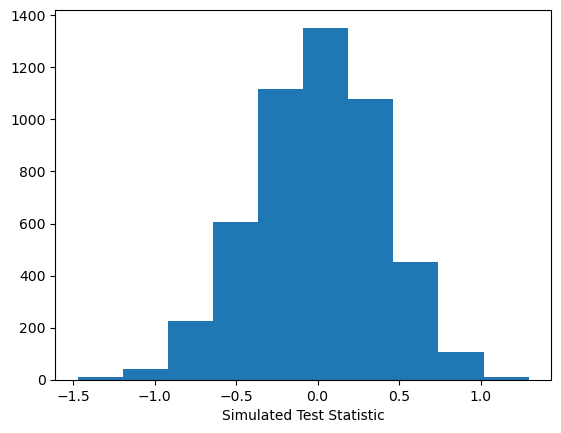

In [8]:
plt.hist(simulated_stats)
plt.xlabel("Simulated Test Statistic");

In [ ]:
p_val = np.count_nonzero(simulated_stats >= obs_stat) / 5000
p_val

0

The p-value of this test was 0%, which leads us to reject the null hypothesis at every single p-value cutoff.